In [57]:
import numpy as np
import pandas as pd

from statsmodels.tsa.arima.model import ARIMA

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
plt.rcParams["figure.figsize"] = (15,6)

In [50]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [51]:
x= '1-1'

parser(x)

datetime.datetime(1901, 1, 1, 0, 0)

In [52]:
df = pd.read_csv('shampoo.txt', parse_dates=[0], date_parser=parser, index_col='Month')

In [53]:
df.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


<AxesSubplot:xlabel='Month'>

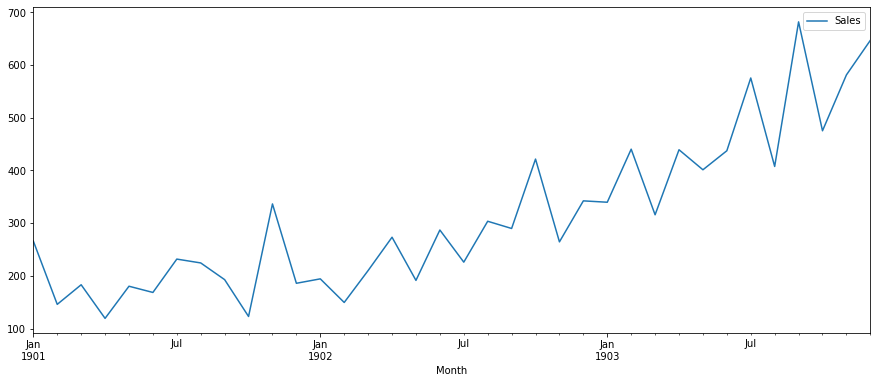

In [54]:
df.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

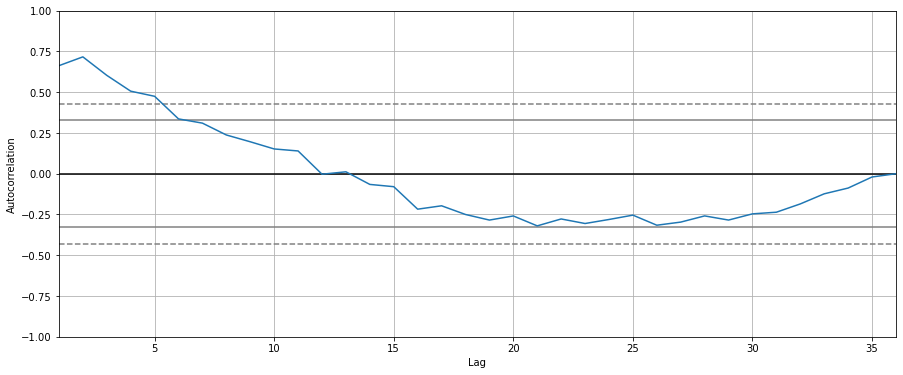

In [55]:
pd.plotting.autocorrelation_plot(df)

In [60]:
model = ARIMA(df, order=(5, 1, 0))
model = model.fit()

C:\Users\Abdulaziz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Abdulaziz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Abdulaziz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Thu, 18 Feb 2021   AIC                            408.969
Time:                        13:28:08   BIC                            418.301
Sample:                    01-01-1901   HQIC                           412.191
                         - 12-01-1903                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.798      -0.497       0.646
ar.L4          0.2519      0.340      0.742      0.458      -0.414       0.918
ar.L5          0.3344      0.210      1.593      0.111      -0.077       0.746
sigma2      4728.9607   1316.021      3.593      0.000    2149.607    7308.314
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                 0.96
Prob(Q):                              0.44   Prob(JB):                         0.62
Heteroskedasticity (H):               1.07   Skew:                             0.28
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
residuals = pd.DataFrame(model.resid)
residuals.head()

,0
Month,
1901-01-01,266.000000
1901-02-01,-117.619577
1901-03-01,-51.500988
1901-04-01,-60.648283
1901-05-01,16.189737


<AxesSubplot:xlabel='Month'>

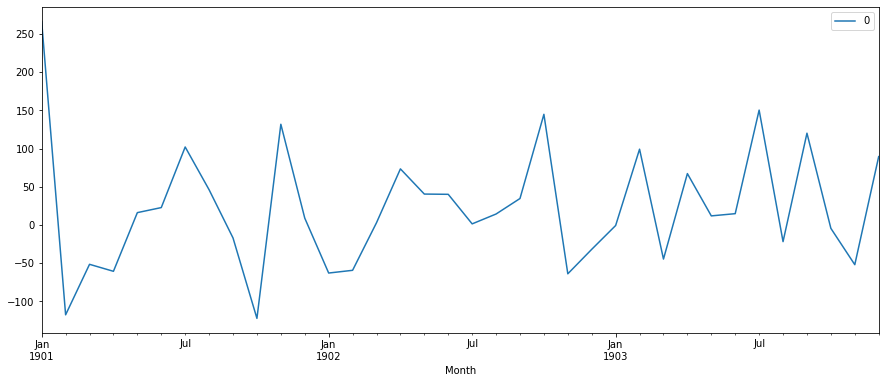

In [67]:
residuals.plot()

<AxesSubplot:ylabel='Density'>

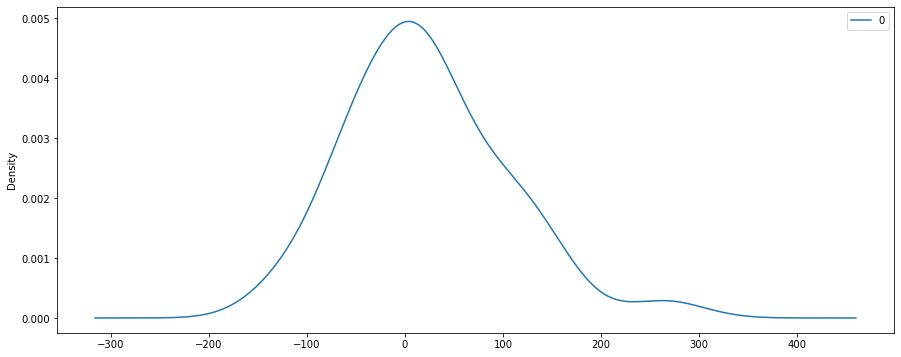

In [68]:
residuals.plot(kind='kde')

In [69]:
residuals.describe()

,0
count,36.000000
mean,21.936145
std,80.774430
min,-122.292030
25%,-35.040859
50%,13.147219
75%,68.848286
max,266.000000


In [110]:
predictions = model.predict(start=35, end =50)

In [111]:
df_predictions = pd.DataFrame(predictions)
df_predictions

,predicted_mean
1903-12-01,557.328858
1904-01-01,561.113738
1904-02-01,671.054470
1904-03-01,554.031815
1904-04-01,679.972138
1904-05-01,601.711133
1904-06-01,633.764693
1904-07-01,639.430680
1904-08-01,613.756567
1904-09-01,660.395041


<AxesSubplot:xlabel='Month', ylabel='Sales'>

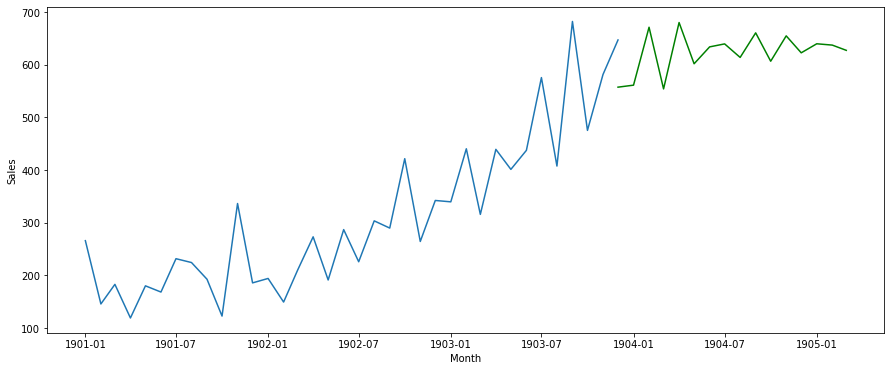

In [112]:
sns.lineplot(data=df, x=df.index, y=df['Sales'])
sns.lineplot(data=df_predictions, x=df_predictions.index, y=df_predictions['predicted_mean'], color='green')

---

# 

In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from math import sqrt

In [74]:
X_train, X_test = train_test_split(df, test_size=0.2)